### Medical Cost Personal Dataset ("insurance.csv") 
https://www.kaggle.com/mirichoi0218/insurance

#### Insurance data for customers in the USA with customer attributes of Age, Gender, Body-Mass Index, # of dependents and
#### Smoker/Non-Smoker and their corresponding annual Insurance charges

In [2]:
import pandas as pd
import numpy as np
#
import warnings
warnings.filterwarnings("ignore")
#
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
series1 = df.charges
series1.dtype

dtype('float64')

In [4]:
series1.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [37]:
series1.shape

(1338,)

### Boston Housing Dataset and Attribute Descriptor ("boston.csv")
https://rstudio-pubs-static.s3.amazonaws.com/364346_811c9012a14847428c9b1fc1e956431a.html

In [8]:
df1 = pd.read_csv('boston.csv')
df1.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [9]:
series2 = df1.TAX
series2.dtype
series2.head()

0    296.0
1    242.0
2    242.0
3    222.0
4    222.0
Name: TAX, dtype: float64

In [10]:
series2.shape

(506,)

### Titanic Disaster Dataset ("titanic.csv")

https://data.world/nrippner/titanic-disaster-dataset

In [11]:
df2 = pd.read_csv('titanic.csv')
df2.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [12]:
series3 = df2.fare
series3.dropna(inplace = True)
series3.dtype

dtype('float64')

In [13]:
series3.shape

(1309,)

In [54]:
series3.mean()

33.270043468296564

# Central Limit Theorem

In [34]:
def central_limit_theorem(data,n_samples = 1000, sample_size = 200, min_value = 0, max_value = MAX):
    """ Use this function to demonstrate Central Limit Theorem. 
        data = 1D array, or a pd.Series
        n_samples = number of samples to be created
        sample_size = size of the individual sample
        min_value = minimum index of the data
        max_value = maximum index value of the data """
    %matplotlib inline
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    b = {}
    for i in range(n_samples):
        x = np.unique(np.random.randint(min_value, max_value, size = sample_size)) # set of random numbers with a specific size
        b[i] = data[x].mean()   # Mean of each sample
    c = pd.DataFrame()
    c['sample'] = b.keys()  # Sample number 
    c['Mean'] = b.values()  # mean of that particular sample
    plt.figure(figsize= (15,5))

    plt.subplot(1,2,1)
    sns.distplot(c.Mean)
    plt.title(f"Sampling Distribution of {Attribute}. \n \u03bc = {round(c.Mean.mean(), 3)} & SE = {round(c.Mean.std(),3)}")
    plt.xlabel('data')
    plt.ylabel('freq')

    plt.subplot(1,2,2)
    sns.distplot(data)
    plt.title(f"population Distribution of {Attribute}. \n \u03bc = {round(data.mean(), 3)} & \u03C3 = {round(data.std(),3)}")
    plt.xlabel('data')
    plt.ylabel('freq')

    plt.show()

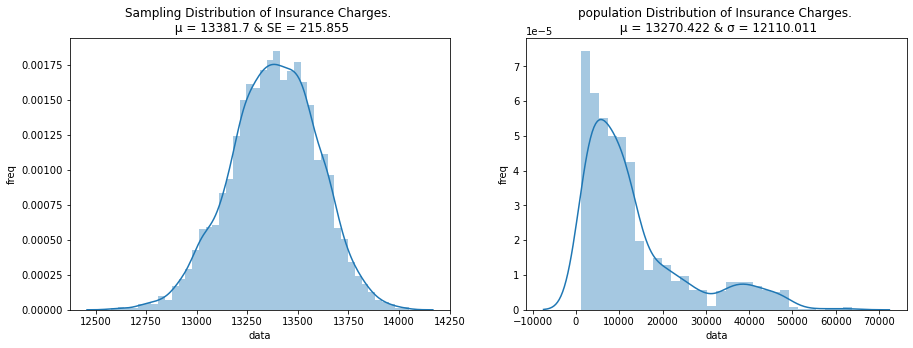

In [42]:
MAX=series1.shape[0]
Attribute='Insurance Charges'
central_limit_theorem(series1,n_samples = 5000, sample_size = 1000);

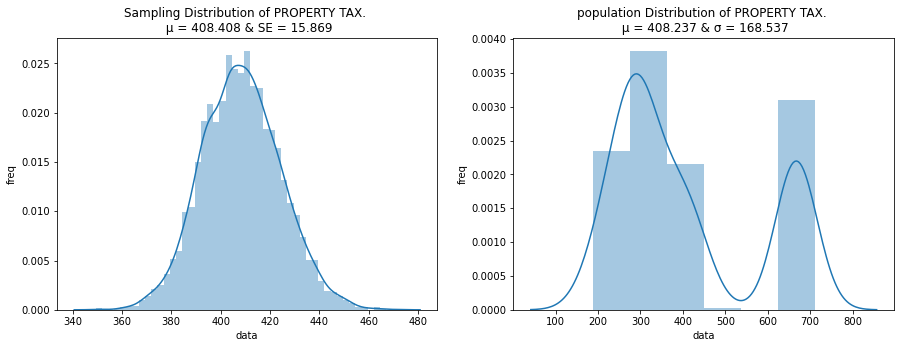

In [46]:
MAX=series2.shape[0]
Attribute='PROPERTY TAX'
central_limit_theorem(series2, n_samples = 5000, sample_size = 100);
# Note the multimodal population distribution of Property TAX

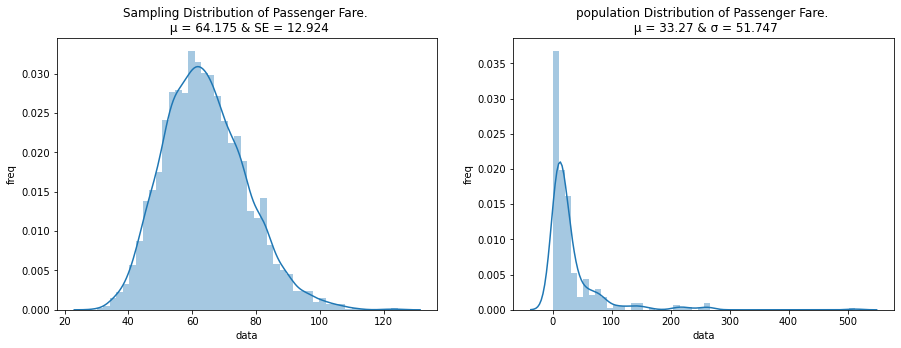

In [56]:
MAX=series3.shape[0]
Attribute='Passenger Fare'
central_limit_theorem(series3, n_samples = 5000, sample_size = 30);
# Note that the Titanic had a lot of passengers close to zero fare! so population mean is low (right skewed) and it is a non-normal distribution

## Play with the parameters and see how the output changes